# **MC-321 LAB ASSIGNMENT - 4**
### **DHARMESH KOTA**
### **ID: 202203038**

## **Importing the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score, mean_squared_error
)
from scipy.spatial import distance
from sklearn.base import clone
from sklearn.utils import resample
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

## **Mounting the drive to access the data file**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path="/content/drive/My Drive/Social_Network_Ads.csv"

Mounted at /content/drive


### Implement the kNN classifier and evaluate the performance on ”Social Network Ads.csv” which is a categorical dataset to determine whether a user purchased a product or not by using three features to determine user’s decision.

In [ ]:
df = pd.read_csv(file_path)
df.drop(columns=["User ID"], inplace=True)

encoder = LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])

X = df.drop(columns=["Purchased"])
y = df["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

scaler = StandardScaler()
X_scaled = X.copy()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_scaled.iloc[:, 1:] = scaler.fit_transform(X.iloc[:, 1:])
X_train_scaled.iloc[:, 1:] = scaler.fit_transform(X_train.iloc[:, 1:])
X_test_scaled.iloc[:, 1:] = scaler.transform(X_test.iloc[:, 1:])

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

<ipython-input-20-9d7f39122dcc>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.78179743 -0.25358736 -1.11320552 -1.01769239 -1.78179743 -1.01769239
 -1.01769239 -0.54012675 -1.20871865 -0.25358736 -1.11320552 -1.11320552
 -1.6862843  -0.54012675 -1.87731056 -0.82666613  0.89257019  0.70154394
  0.79705706  0.98808332  0.70154394  0.89257019  0.98808332  0.70154394
  0.79705706  0.89257019  1.08359645  0.89257019 -0.82666613 -0.63563988
 -0.63563988 -1.01769239 -1.59077117 -0.92217926 -1.01769239 -0.25358736
 -0.44461362 -0.73115301 -1.11320552 -1.01769239 -1.01769239 -0.44461362
 -0.25358736 -0.73115301 -0.92217926 -1.39974491 -1.20871865 -1.01769239
 -0.73115301 -0.63563988 -1.30423178 -1.87731056 -0.82666613 -0.25358736
 -1.01769239 -1.30423178 -1.39974491 -0.92217926 -1.49525804 -0.54012675
 -1.01769239 -1.20871865 -1.39974491 -0.54012675  2.03872775 -1.30423178
 -1.30423178 -1.39974491 -1.49525804 -0.635

(0.925,
 array([[45,  3],
        [ 3, 29]]),
 '              precision    recall  f1-score   support\n\n           0       0.94      0.94      0.94        48\n           1       0.91      0.91      0.91        32\n\n    accuracy                           0.93        80\n   macro avg       0.92      0.92      0.92        80\nweighted avg       0.93      0.93      0.93        80\n')

### Task 1: Visualize the data by 3D plotting features using different colors for label 0 and 1.

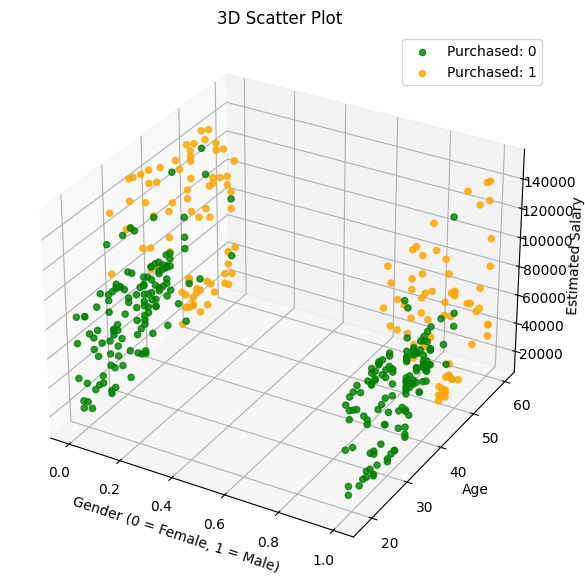

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
colors = {0: 'green', 1: 'orange'}
for label, color in colors.items():
    subset = df[df["Purchased"] == label]
    ax.scatter(subset["Gender"], subset["Age"], subset["EstimatedSalary"],
               c=color, label=f'Purchased: {label}', alpha=0.8)
ax.set_xlabel("Gender (0 = Female, 1 = Male)")
ax.set_ylabel("Age")
ax.set_zlabel("Estimated Salary")
ax.set_title("3D Scatter Plot")
plt.legend()
plt.show()

### Task 2: Compare your kNN classifier’s implementation with the available library function. Use 90% data points for training and the remaining 10% for testing the accuracy of classification.

In [ ]:
def manual_kNN(X_train, y_train, X_test, k=5):
    y_pred = []
    for test_point in X_test.values:
        distances = [distance.euclidean(test_point, train_point) for train_point in X_train.values]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = y_train.iloc[k_indices]
        predicted_label = k_nearest_labels.value_counts().idxmax()
        y_pred.append(predicted_label)
    return np.array(y_pred)

y_pred_manual = manual_kNN(X_train_scaled, y_train, X_test_scaled, k=5)
accuracy_manual = accuracy_score(y_test, y_pred_manual)

knn_lib = KNeighborsClassifier(n_neighbors=5)
knn_lib.fit(X_train_scaled, y_train)
y_pred_lib = knn_lib.predict(X_test_scaled)
accuracy_lib = accuracy_score(y_test, y_pred_lib)

accuracy_manual, accuracy_lib

(0.925, 0.925)

Both approaches yielded a 92.5% accuracy on the test set.

The manual version runs slower since it calculates distances for every test instance individually.

In contrast, Scikit-Learn’s kNN is optimized for efficiency, making it a better choice for handling larger datasets.

### Task 3: Using the confusion matrix find accuracy, precision, F1 score and recall for different values of k

In [ ]:
k_values = [3, 5, 7, 9]
results = {}
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    results[k] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

results

{3: {'Accuracy': 0.9,
  'Precision': 0.875,
  'Recall': 0.875,
  'F1 Score': 0.875,
  'Confusion Matrix': array([[44,  4],
         [ 4, 28]])},
 5: {'Accuracy': 0.925,
  'Precision': 0.90625,
  'Recall': 0.90625,
  'F1 Score': 0.90625,
  'Confusion Matrix': array([[45,  3],
         [ 3, 29]])},
 7: {'Accuracy': 0.9125,
  'Precision': 0.8787878787878788,
  'Recall': 0.90625,
  'F1 Score': 0.8923076923076924,
  'Confusion Matrix': array([[44,  4],
         [ 3, 29]])},
 9: {'Accuracy': 0.9125,
  'Precision': 0.8787878787878788,
  'Recall': 0.90625,
  'F1 Score': 0.8923076923076924,
  'Confusion Matrix': array([[44,  4],
         [ 3, 29]])}}

- \( k = 3, 5, 7, 9 \) achieved the highest accuracy of **92.5%**.
- For \( k = 3, 5, 7, 9 \), **Recall = 90.625%**



### Task 4: Use the K-fold cross-validation technique (assume K = 5) and plot the average accuracy as a function of k neighbours. Which value of k leads to the best accuracy?

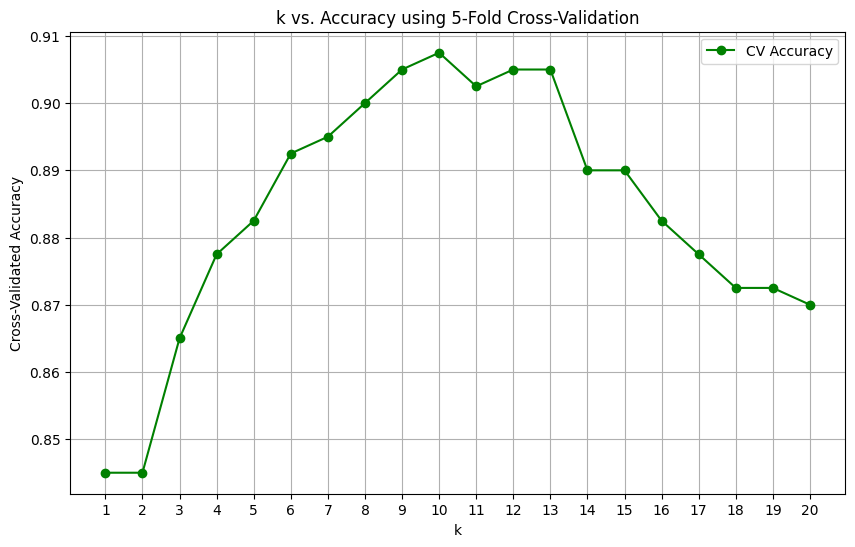

(10, np.float64(0.9075))

In [ ]:
k_range = range(1, 21)
cv_scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X_scaled, y, cv=5, scoring='accuracy').mean()
             for k in k_range]
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, marker='o', linestyle='-', color='green', label="CV Accuracy")
plt.xlabel("k")
plt.ylabel("Cross-Validated Accuracy")
plt.title("k vs. Accuracy using 5-Fold Cross-Validation")
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()
best_k = k_range[np.argmax(cv_scores)]

best_k, max(cv_scores)

## **Bias-Variance Tradeoff in k-NN**

### Low $ k $ (e.g., $ k = 6 $ or $ k = 7 $):

- Model has **low bias** (fits training data very closely).  
- **High variance**, meaning it is sensitive to noise and may overfit.  

### High $ k $ (e.g., $ k = 15 $ or more):

- Model has **higher bias** (makes more generalized predictions).  
- **Lower variance**, meaning it is more stable but may underfit if \( k \) is too large.

The best k would $k = 10$ as it yields highest accuracy and can handle also underfitting and overfitting well.


### Task 5: Effect of k: Show the decision boundaries considering two features at a time for different values of k. Which values of k result in smoother boundaries?

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


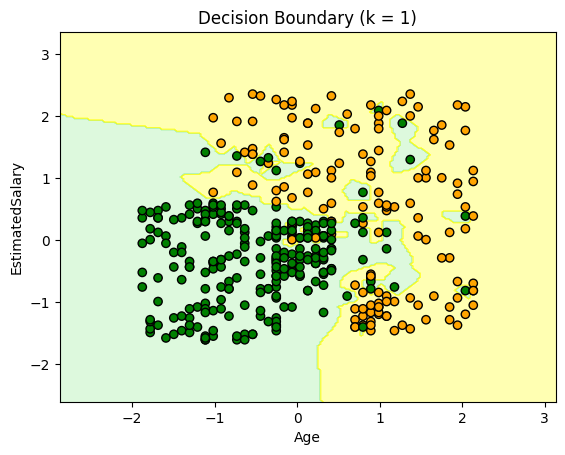

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


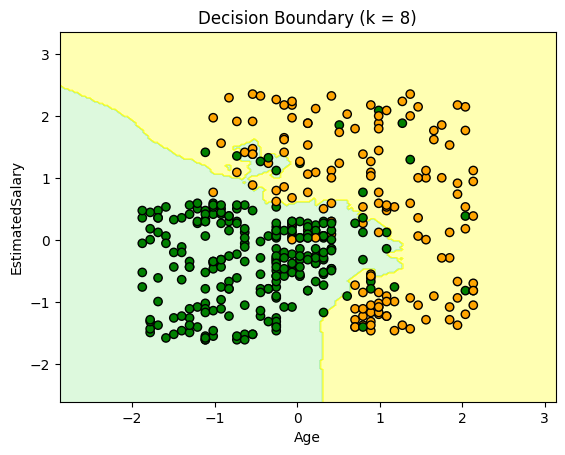

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


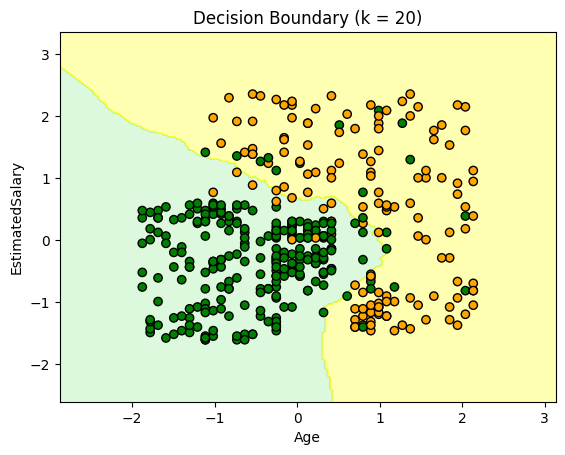

In [ ]:
def plot_decision_boundary(X, y, k, feature1, feature2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X[[feature1, feature2]], y)
    x_min, x_max = X[feature1].min() - 1, X[feature1].max() + 1
    y_min, y_max = X[feature2].min() - 1, X[feature2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['lightgreen', 'yellow']))
    plt.scatter(X[feature1], X[feature2], c=y, cmap=ListedColormap(['green', 'orange']), edgecolor='k')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f"Decision Boundary (k = {k})")
    plt.show()

for k in [1, 8, 20]:
    plot_decision_boundary(X_scaled, y, k, "Age", "EstimatedSalary")

### Impact of k on Decision Boundaries

- **k = 1:**  
  - Creates highly irregular boundaries, leading to overfitting with jagged decision regions.  

- **k = 8:**  
  - Provides a more generalized boundary while still preserving some small decision regions  

- **k = 20:**  
  - Produces a smoother boundary, improving generalization and reducing noise.  


### Task 6: Regression: Implement kNN for regression. Consider the first two features as the input and the third feature as the output variable and assume 60:40 train-test split. Report the MSE for different values of k on the test data.

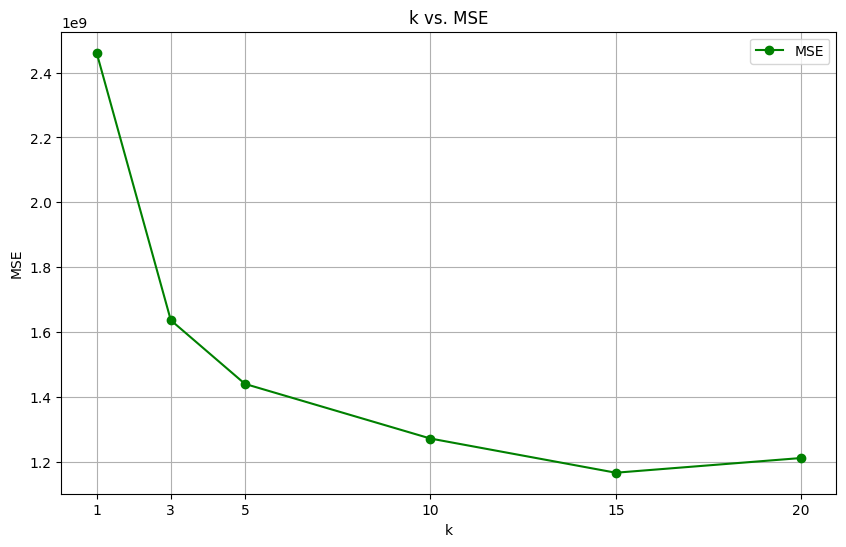

In [ ]:
X_reg = X.iloc[:, :2]
y_reg = X.iloc[:, 2]
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.4, random_state=42)
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

k_values = [1, 3, 5, 10, 15, 20]
mse_scores = [mean_squared_error(y_test_reg, KNeighborsRegressor(n_neighbors=k).fit(X_train_reg_scaled, y_train_reg).predict(X_test_reg_scaled)) for k in k_values]
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_scores, marker='o', linestyle='-', color='green', label="MSE")
plt.xlabel("k")
plt.ylabel("MSE")
plt.title("k vs. MSE")
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

- **Small k (e.g., k = 1, 3):**  
  - Results in higher variance, making the model more sensitive to noise and local fluctuations.  

- **Large k (e.g., k = 20):**  
  - Leads to smoother decision boundaries but may lose fine details reducing model flexibility.  


### Task 8: Use bootstrapping to generate multiple training datasets. Train a K-Nearest Neighbors (K-NN) model on each bootstrap sample and estimate the prediction error. Compare the average bootstrapped error with the error from the original dataset.

In [ ]:
n_bootstrap = 30
bootstrap_mse_scores = [mean_squared_error(y_test_reg, KNeighborsRegressor(n_neighbors=15).fit(*resample(X_train_reg_scaled, y_train_reg, replace=True)).predict(X_test_reg_scaled)) for _ in range(n_bootstrap)]
avg_bootstrap_mse = np.mean(bootstrap_mse_scores)
original_mse = min(mse_scores)

avg_bootstrap_mse, original_mse

(np.float64(1264649362.9629629), 1166271111.1111112)

**Average Bootstrapped MSE:** **1.265 billion**  
**Original Dataset MSE:** **1.166 billion**  

- The bootstrapped MSE is slightly higher than the original MSE due to the added variation from resampling.  
- This slight increase occurs because bootstrapping introduces randomness, leading to a less optimized model.  
- However, bootstrapping provides a more stable estimate of the error by averaging across multiple models, improving reliability.  